In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scs
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score, roc_curve, auc
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 2000)

# SOMMAIRE

* [Donnée](#chapter1)
    * [Loading data](#section_1_1)
    * [Data preparation](sSection_1_2)
        
* [Analyse et prédiction](#chapter2)
    * [Analyse univariée et multivariée](#section_2_1)
    * [ACP](#section_2_2)
    * [K-Means](#section_2_2)
    * [Regression Logistique](#section_2_2)
    * [Tests](#section_2_2)
    * [Conclusion](#section_2_2)

<font size=6><b>Loading Data</b></font>


In [2]:
billet=pd.read_csv('billets.csv',sep=';')
billet


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
5           True    172.17       103.74        104.08        4.42       2.95   
6           True    172.34       104.18        103.85        4.58       3.26   
7           True    171.88       103.76        104.08        3.98       2.92   
8           True    172.47       103.92        103.67        4.00       3.25   
9           True    172.47       104.07        104.02        4.04       3.25   
10          True    171.83       104.14        103.62        3.16       3.18   
11          True    171.84       104.59        104.00        3.88       3.27   
12          True    171.89       103.89        103.40        4.11       2.96   
13          True    172.20       104.35        103.67        4.44       3.38   
14          True    172.06       103.87        103.83        4.09       2.92   
15          True    171.73       103.92        103.74        4.43       2.78   
16          True    171.30       104.19        103.70        4.12       2.82   
17          True    171.88       104.47        103.45        4.56       3.33   
18          True    172.47       103.89        104.14        3.74       3.28   
19          True    171.90       103.67        103.15        4.55       3.15   
20          True    171.87       103.91        103.96        3.74       2.97   
21          True    171.82       103.65        103.64        4.25       2.80   
22          True    172.10       103.96        103.71        3.93       2.89   
23          True    172.56       103.85        103.62        3.32       3.13   
24          True    172.22       103.75        103.89        4.18       3.19   
25          True    172.09       103.63        103.33        4.32       2.88   
26          True    171.83       103.44        103.70        4.15       3.10   
27          True    171.88       103.92        103.74        4.02       3.17   
28          True    172.02       104.18        104.16        3.97       3.23   
29          True    171.58       103.59        103.79        4.10       2.92   
30          True    171.71       103.95        103.97        4.00       2.83   
31          True    171.98       104.33        103.61        3.68       3.14   
32          True    171.99       103.79        103.90        4.62       2.90   
33          True    171.85       104.10        103.88        4.13       2.93   
34          True    172.29       103.61        104.44        4.54       2.69   
35          True    172.01       103.81        103.65        4.36       3.03   
36          True    171.80       104.28        104.06        4.47       3.29   
37          True    171.73       104.10        104.19        3.39       3.19   
38          True    172.00       103.76        104.27        4.42       3.29   
39          True    172.28       104.11        104.19        3.93       3.08   
40          True    172.44       103.96        104.55        3.73       2.86   
41          True    172.08       104.19        103.82        3.99       3.21   
42          True    172.10       103.73        103.33        3.72       3.02   
43          True    172.40       103.41        103.85        4.01       3.15   
44          True    171.79       103.83        103.76        3.99       3.18   
45          True    171.42       104.65        103.63        3.99       3.05   
46          True    171.47       103.74        104.42        4.19       2.92   
47          True    172.13       104.15        103.93        3.97       2.87   
48          True    172.07       104.05        103.82        3.71       3.61   
49    

<font size=6><b>Data Preparation</b></font>


In [3]:
billet.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

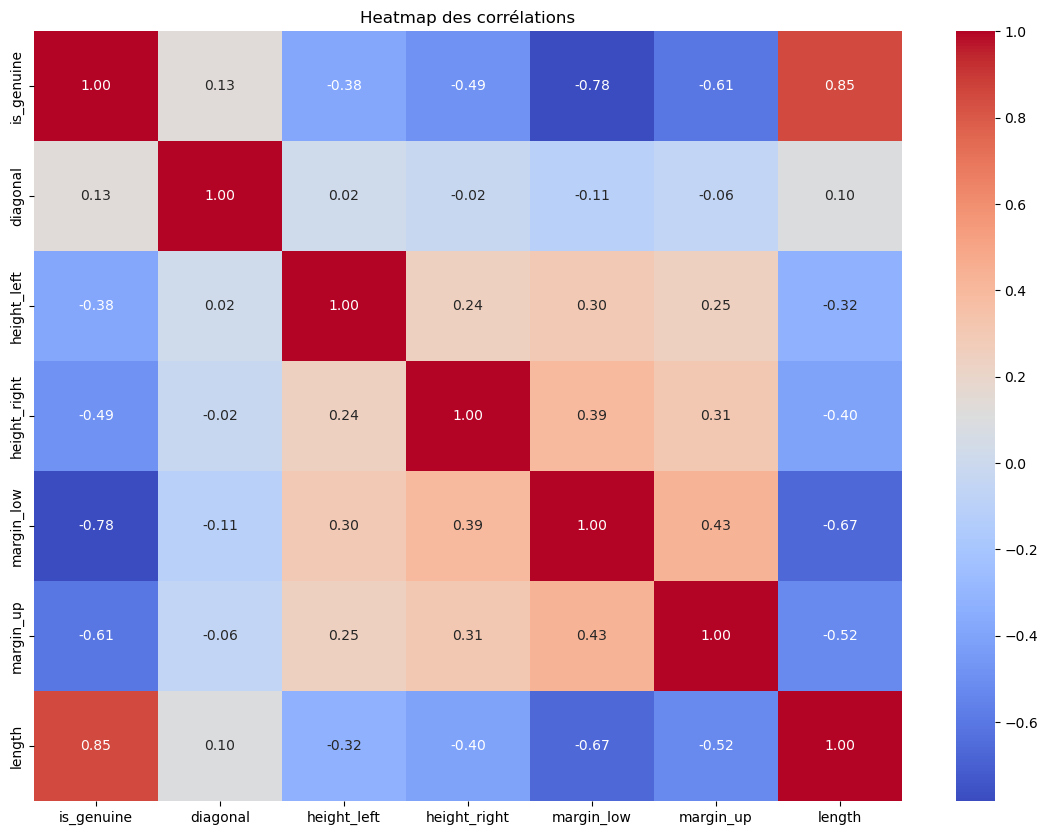

In [4]:
plt.figure(figsize=(14,10))
sns.heatmap(billet.corr(), annot=True, fmt='.2f', cmap = 'coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

Length et is_genuine ont toutes les deux de fortes corrélations avec les autres variables explicatives de notre futur modèle.  
Mais, elles ont également un lien très fort avec la margin_low ( respectivement 0,67 et 0,78 ) et donc sont le plus à même d'expliquer cette variable.  
Nous allons donc faire deux modèles incorporant séparement les deux variables et nous arbitrerons entre les deux modèles.

In [5]:
df_entrainement1=billet[billet['margin_low'].notnull()]
df_entrainement1.drop(["is_genuine"],axis=1,inplace=True)
#df_vm_test=billet[billet['margin_low'].isnull()]
#df_vm.drop(["length"],axis=1)#Trop corrélée à margin_low
# creating feature variables
X =df_entrainement1.drop(['margin_low'], axis=1)
y = df_entrainement1['margin_low']
  
print(X)
print(y)
  
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
  
# creating a regression model
reg1 = LinearRegression()
  
# fitting the model
reg1.fit(X_train, y_train)
  
# making predictions
predictions = reg1.predict(X_test)
  


C:\Users\picar\AppData\Local\Temp\ipykernel_48812\2639741070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrainement1.drop(["is_genuine"],axis=1,inplace=True)


      diagonal  height_left  height_right  margin_up  length
0       171.81       104.86        104.95       2.89  112.83
1       171.46       103.36        103.66       2.99  113.09
2       172.69       104.48        103.50       2.94  113.16
3       171.36       103.91        103.94       3.01  113.51
4       171.73       104.28        103.46       3.48  112.54
5       172.17       103.74        104.08       2.95  112.81
6       172.34       104.18        103.85       3.26  112.81
7       171.88       103.76        104.08       2.92  113.08
8       172.47       103.92        103.67       3.25  112.85
9       172.47       104.07        104.02       3.25  113.45
10      171.83       104.14        103.62       3.18  113.22
11      171.84       104.59        104.00       3.27  113.08
12      171.89       103.89        103.40       2.96  113.24
13      172.20       104.35        103.67       3.38  113.65
14      172.06       103.87        103.83       2.92  113.19
15      171.73       103

In [6]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.23046803300322397
mean_absolute_error :  0.3624658671407384


In [7]:
df_entrainement2=billet[billet['margin_low'].notnull()]
#df_entrainement2=df_entrainement2[df_entrainement2['is_genuine']==False]
df_entrainement2.drop(["length"],axis=1,inplace=True)
df_entrainement2['is_genuine'] = df_entrainement2['is_genuine'].apply(lambda x: 1 if x == True else 0)
X =df_entrainement2.drop(['margin_low'], axis=1)
y = df_entrainement2['margin_low']
  
print(X)
print(y)
  
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
  
# creating a regression model
reg2 = LinearRegression()
  
# fitting the model
reg2.fit(X_train, y_train)
  
# making predictions
predictions = reg2.predict(X_test)
  


      is_genuine  diagonal  height_left  height_right  margin_up
0              1    171.81       104.86        104.95       2.89
1              1    171.46       103.36        103.66       2.99
2              1    172.69       104.48        103.50       2.94
3              1    171.36       103.91        103.94       3.01
4              1    171.73       104.28        103.46       3.48
5              1    172.17       103.74        104.08       2.95
6              1    172.34       104.18        103.85       3.26
7              1    171.88       103.76        104.08       2.92
8              1    172.47       103.92        103.67       3.25
9              1    172.47       104.07        104.02       3.25
10             1    171.83       104.14        103.62       3.18
11             1    171.84       104.59        104.00       3.27
12             1    171.89       103.89        103.40       2.96
13             1    172.20       104.35        103.67       3.38
14             1    172.0

C:\Users\picar\AppData\Local\Temp\ipykernel_48812\1203714954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrainement2.drop(["length"],axis=1,inplace=True)
C:\Users\picar\AppData\Local\Temp\ipykernel_48812\1203714954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrainement2['is_genuine'] = df_entrainement2['is_genuine'].apply(lambda x: 1 if x == True else 0)


0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
5       4.42
6       4.58
7       3.98
8       4.00
9       4.04
10      3.16
11      3.88
12      4.11
13      4.44
14      4.09
15      4.43
16      4.12
17      4.56
18      3.74
19      4.55
20      3.74
21      4.25
22      3.93
23      3.32
24      4.18
25      4.32
26      4.15
27      4.02
28      3.97
29      4.10
30      4.00
31      3.68
32      4.62
33      4.13
34      4.54
35      4.36
36      4.47
37      3.39
38      4.42
39      3.93
40      3.73
41      3.99
42      3.72
43      4.01
44      3.99
45      3.99
46      4.19
47      3.97
48      3.71
49      4.42
50      4.28
51      4.49
52      3.49
53      4.49
54      3.95
55      3.77
56      4.36
57      4.01
58      4.07
59      4.05
60      3.71
61      3.99
62      4.01
63      4.14
64      3.44
65      4.38
66      3.80
67      3.97
68      3.79
69      4.08
70      4.35
71      4.09
73      4.08
74      3.81
75      4.16
76      4.14
77      4.11

In [8]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.176210304794391
mean_absolute_error :  0.3143927245588251


mean squared error 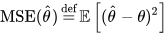

Mean Absolute error 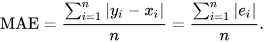

MSE mesure l'écart entre notre estimateur de margin_low et le "vrai" margin low du data set entrainement.
MAE mesure la moyenne arithmétique des erreurs où y est la prédiction et x la vraie valeur.

Entre nos deux regressions, celle ayant la plus petite mse et mae est celle dont on a omis "length". C'est donc ce modèle que nous allons utiliser pour calculer les 37 valeurs manquantes de margin_low de notre dataset

In [9]:
reg2.coef_.round(3)#dans l'ordre is_genuine  diagonal  height_left  height_right  margin_up

array([-1.136, -0.   ,  0.016,  0.042, -0.207])

In [10]:
df_test=billet[billet['margin_low'].isnull()]
X =df_test.drop(['margin_low','length'], axis=1)
df_test.loc[:,"margin_low"]=reg2.predict(X)
df_test



C:\Users\picar\AppData\Local\Temp\ipykernel_48812\3969565519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"margin_low"]=reg2.predict(X)


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45    4.066003       3.25   
99          True    171.93       104.07        104.18    4.122292       3.14   
151         True    172.07       103.80        104.38    4.151253       3.02   
197         True    171.45       103.66        103.80    4.000445       3.62   
241         True    171.83       104.14        104.06    4.143291       3.02   
251         True    171.80       103.26        102.82    4.091876       2.95   
284         True    171.92       103.83        103.76    4.082210       3.23   
334         True    171.85       103.70        103.96    4.136271       3.00   
410         True    172.56       103.72        103.51    4.092598       3.12   
413         True    172.30       103.66        103.50    4.083013       3.16   
445         True    172.34       104.42        103.22    4.114408       3.01   
481         True    171.81       103.53        103.96    4.193747       2.71   
505         True    172.01       103.97        104.05    4.148420       2.98   
611         True    171.80       103.68        103.49    4.054028       3.30   
654         True    171.97       103.69        103.54    4.180689       2.70   
675         True    171.60       103.85        103.91    4.227899       2.56   
710         True    172.03       103.97        103.86    4.121776       3.07   
739         True    172.07       103.74        103.76    4.109778       3.09   
742         True    172.14       104.06        103.96    4.092097       3.24   
780         True    172.41       103.95        103.79    4.105957       3.13   
798         True    171.96       103.84        103.62    4.122119       3.01   
844         True    171.62       104.14        104.49    4.167616       2.99   
845         True    172.02       104.21        104.05    4.168812       2.90   
871         True    171.37       104.07        103.75    4.118954       3.07   
895         True    171.81       103.68        103.80    4.133405       2.98   
919         True    171.92       103.68        103.45    4.201663       2.58   
945         True    172.09       103.74        103.52    4.114226       3.02   
946         True    171.63       103.87        104.66    4.112386       3.27   
981         True    172.02       104.23        103.72    4.136619       2.99   
1076       False    171.57       104.27        104.44    5.258299       3.21   
1121       False    171.40       104.38        104.19    5.257906       3.17   
1176       False    171.59       104.05        103.94    5.273249       3.02   
1303       False    172.17       104.49        103.76    5.291154       2.93   
1315       False    172.08       104.15        104.17    5.205501       3.40   
1347       False    171.72       104.46        104.12    5.164866       3.61   
1435       False    172.66       104.33        104.41    5.185045       3.56   
1438       False    171.90       104.28        104.29    5.245839       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [11]:
billet.loc[billet.index.isin(df_test.index), "margin_low"] = df_test["margin_low"]
billet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
5           True    172.17       103.74        104.08    4.420000       2.95   
6           True    172.34       104.18        103.85    4.580000       3.26   
7           True    171.88       103.76        104.08    3.980000       2.92   
8           True    172.47       103.92        103.67    4.000000       3.25   
9           True    172.47       104.07        104.02    4.040000       3.25   
10          True    171.83       104.14        103.62    3.160000       3.18   
11          True    171.84       104.59        104.00    3.880000       3.27   
12          True    171.89       103.89        103.40    4.110000       2.96   
13          True    172.20       104.35        103.67    4.440000       3.38   
14          True    172.06       103.87        103.83    4.090000       2.92   
15          True    171.73       103.92        103.74    4.430000       2.78   
16          True    171.30       104.19        103.70    4.120000       2.82   
17          True    171.88       104.47        103.45    4.560000       3.33   
18          True    172.47       103.89        104.14    3.740000       3.28   
19          True    171.90       103.67        103.15    4.550000       3.15   
20          True    171.87       103.91        103.96    3.740000       2.97   
21          True    171.82       103.65        103.64    4.250000       2.80   
22          True    172.10       103.96        103.71    3.930000       2.89   
23          True    172.56       103.85        103.62    3.320000       3.13   
24          True    172.22       103.75        103.89    4.180000       3.19   
25          True    172.09       103.63        103.33    4.320000       2.88   
26          True    171.83       103.44        103.70    4.150000       3.10   
27          True    171.88       103.92        103.74    4.020000       3.17   
28          True    172.02       104.18        104.16    3.970000       3.23   
29          True    171.58       103.59        103.79    4.100000       2.92   
30          True    171.71       103.95        103.97    4.000000       2.83   
31          True    171.98       104.33        103.61    3.680000       3.14   
32          True    171.99       103.79        103.90    4.620000       2.90   
33          True    171.85       104.10        103.88    4.130000       2.93   
34          True    172.29       103.61        104.44    4.540000       2.69   
35          True    172.01       103.81        103.65    4.360000       3.03   
36          True    171.80       104.28        104.06    4.470000       3.29   
37          True    171.73       104.10        104.19    3.390000       3.19   
38          True    172.00       103.76        104.27    4.420000       3.29   
39          True    172.28       104.11        104.19    3.930000       3.08   
40          True    172.44       103.96        104.55    3.730000       2.86   
41          True    172.08       104.19        103.82    3.990000       3.21   
42          True    172.10       103.73        103.33    3.720000       3.02   
43          True    172.40       103.41        103.85    4.010000       3.15   
44          True    171.79       103.83        103.76    3.990000       3.18   
45          True    171.42       104.65        103.63    3.990000       3.05   
46          True    171.47       103.74        104.42    4.190000       2.92   
47          True    172.13       104.15        103.93    3.970000       2.87   
48          True    172.07       104.05        103.82    3.710000       3.61   
49    

In [12]:
faux=billet[billet.is_genuine==False]
vrai=billet[billet.is_genuine==True]

In [13]:
faux.describe(include='all')

is_genuine    diagonal  height_left  height_right  margin_low  \
count         500  500.000000   500.000000    500.000000  500.000000   
unique          1         NaN          NaN           NaN         NaN   
top         False         NaN          NaN           NaN         NaN   
freq          500         NaN          NaN           NaN         NaN   
mean          NaN  171.901160   104.190340    104.143620    5.216244   
std           NaN    0.306861     0.223758      0.270878    0.549107   
min           NaN  171.040000   103.510000    103.430000    3.820000   
25%           NaN  171.690000   104.040000    103.950000    4.840000   
50%           NaN  171.910000   104.180000    104.160000    5.195000   
75%           NaN  172.092500   104.332500    104.320000    5.590000   
max           NaN  173.010000   104.880000    104.950000    6.900000   

         margin_up      length  
count   500.000000  500.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      3.350160  111.630640  
std       0.180498    0.615543  
min       2.920000  109.490000  
25%       3.220000  111.200000  
50%       3.350000  111.630000  
75%       3.472500  112.030000  
max       3.910000  113.850000

In [14]:
vrai.describe(include='all')

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1000  1000.000000  1000.000000    1000.00000  1000.000000   
unique          1          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.987080   103.949130     103.80865     4.116324   
std           NaN     0.300441     0.300231       0.29157     0.314559   
min           NaN   171.040000   103.140000     102.82000     2.980000   
25%           NaN   171.790000   103.740000     103.61000     3.910000   
50%           NaN   171.990000   103.950000     103.81000     4.114317   
75%           NaN   172.200000   104.140000     104.00000     4.330000   
max           NaN   172.920000   104.860000     104.95000     5.040000   

         margin_up       length  
count   1000.00000  1000.000000  
unique         NaN          NaN  
top            NaN          NaN  
freq           NaN          NaN  
mean       3.05213   113.202430  
std        0.18634     0.359552  
min        2.27000   111.760000  
25%        2.93000   112.950000  
50%        3.05000   113.205000  
75%        3.18000   113.460000  
max        3.74000   114.440000

<font size=6><b>Analyse univariée et multivariée</b></font>


In [15]:
liste_var = ["height_left","height_right","margin_low","margin_up","length","diagonal"]
for var in liste_var :
    print(var,":",scs.ks_2samp(billet[var],list(np.random.normal(np.mean(billet[var]), np.std(billet[var]), 1000))))

height_left : KstestResult(statistic=0.035, pvalue=0.44726899698668204)
height_right : KstestResult(statistic=0.037333333333333336, pvalue=0.3668121718724949)
margin_low : KstestResult(statistic=0.129, pvalue=3.8126243949636796e-09)
margin_up : KstestResult(statistic=0.05, pvalue=0.0972493311673314)
length : KstestResult(statistic=0.13833333333333334, pvalue=1.868828130132804e-10)
diagonal : KstestResult(statistic=0.019666666666666666, pvalue=0.972022403759311)


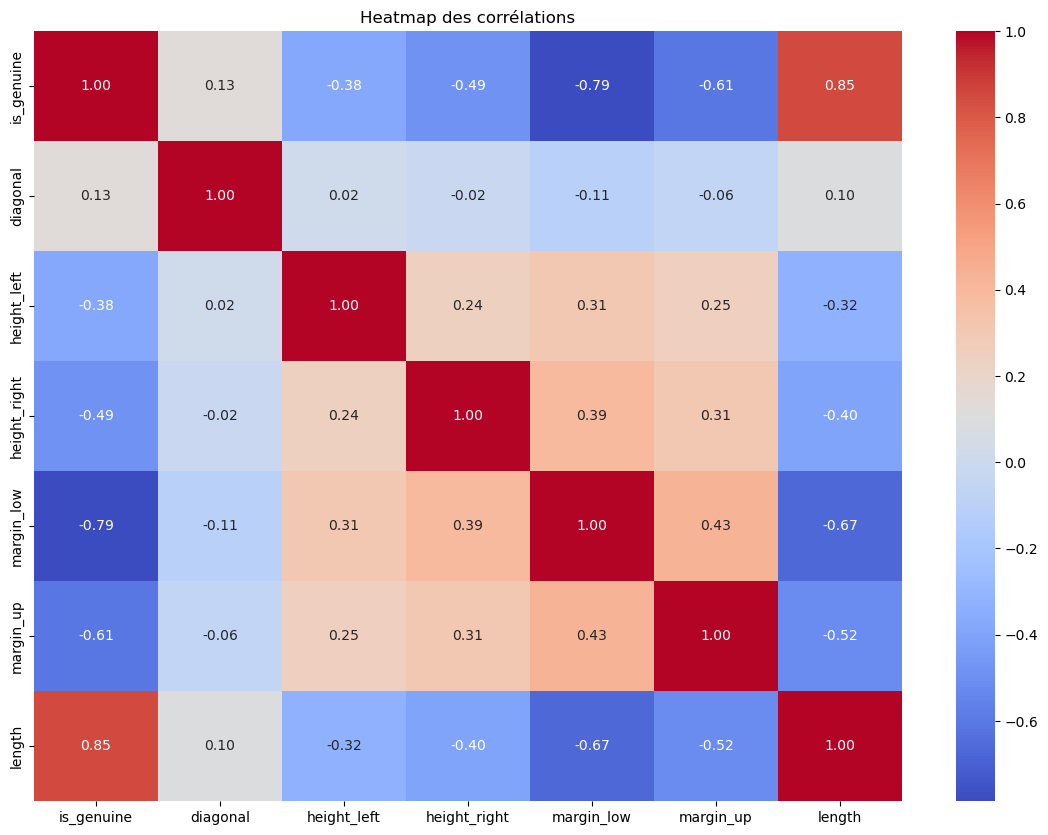

In [16]:
# Création d'une heatmap de notre matrice des corrélations
plt.figure(figsize=(14,10))
sns.heatmap(billet.corr(), annot=True, fmt='.2f', cmap = 'coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

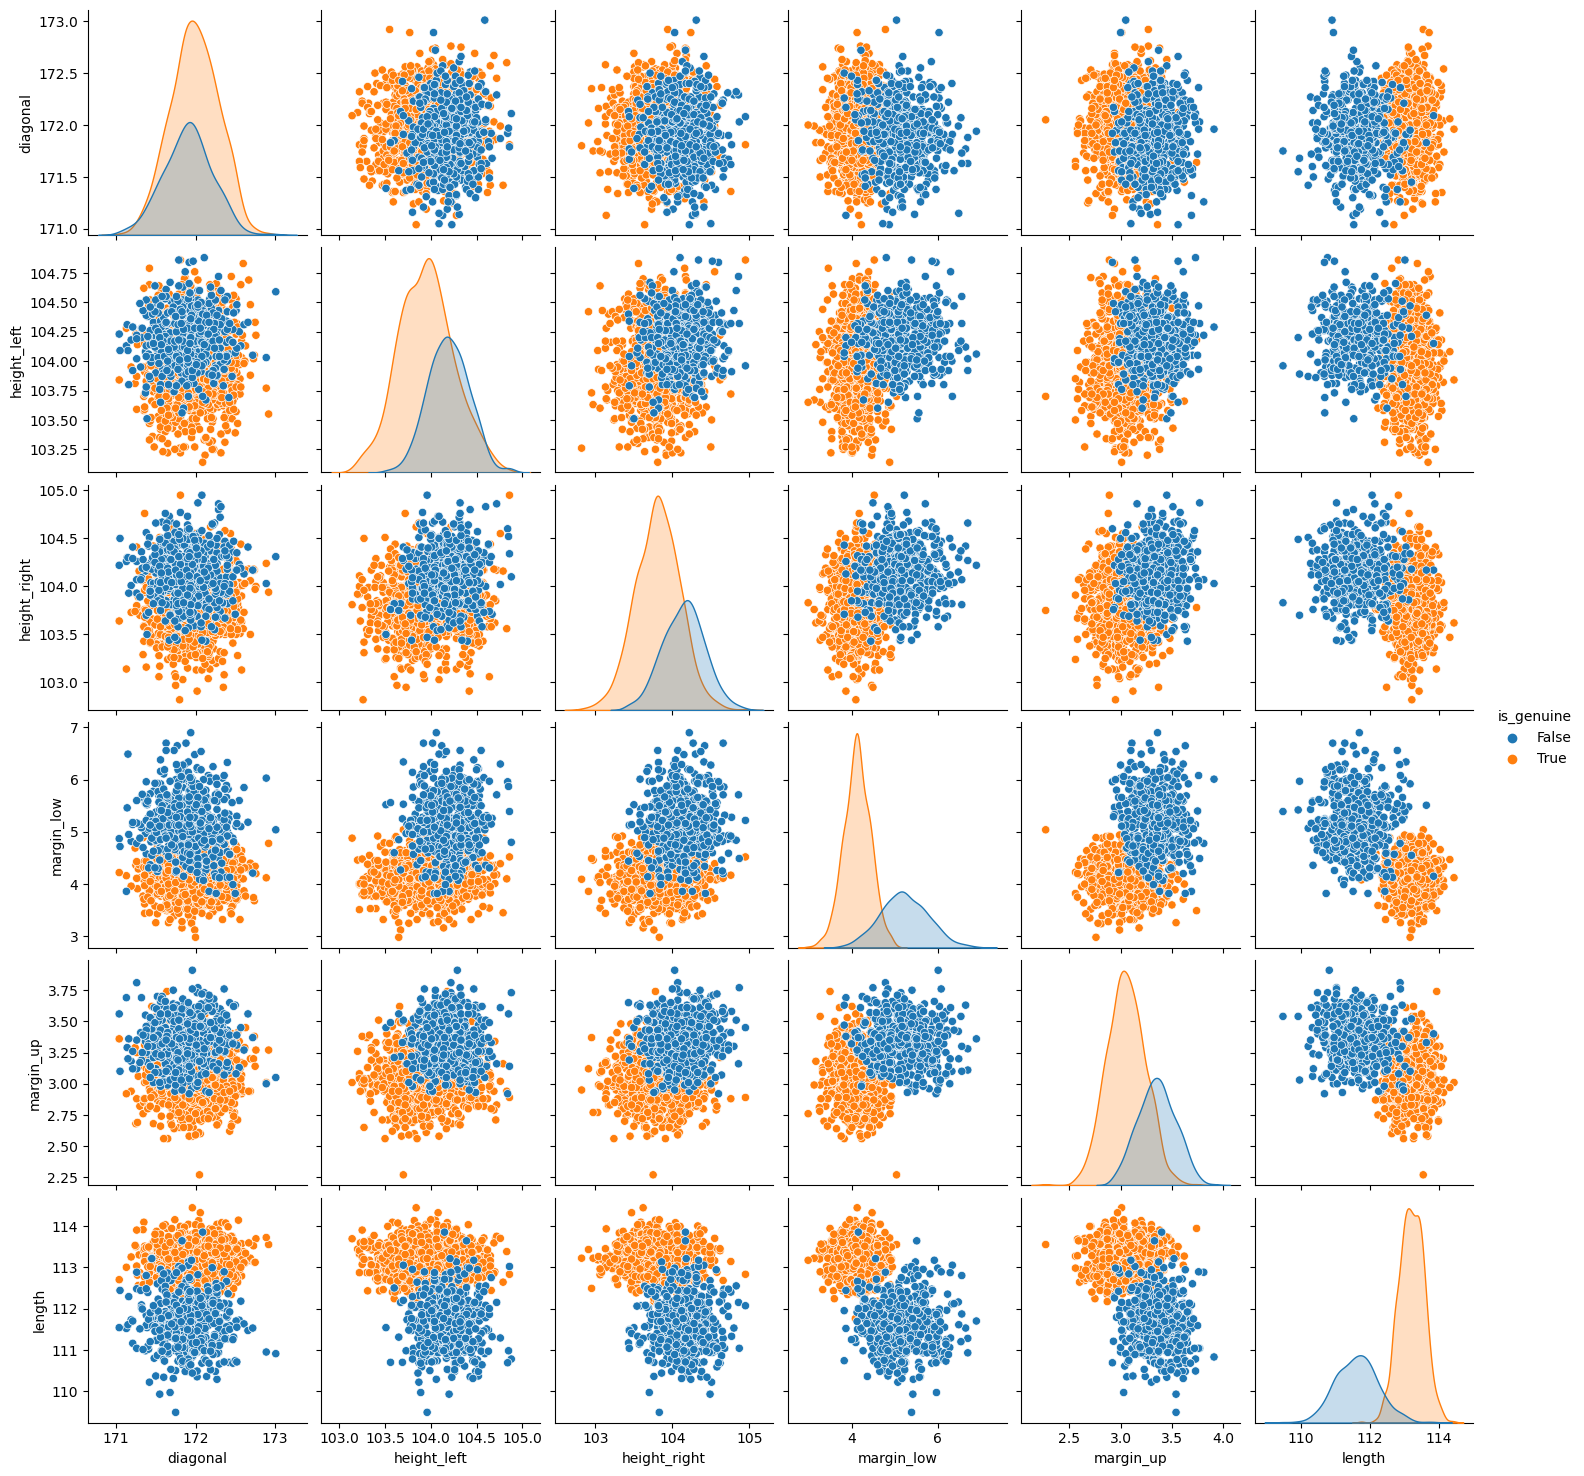

In [17]:
fig = sns.pairplot(billet, hue = 'is_genuine')

<font size=6><b>Conclusion analyse univariée et multivariée :</b></font><br />


<font size=6><b>ACP :</b></font><br />


In [18]:
acp_df = billet.iloc[:, 1:]


In [19]:
#nombre d'observations 
n = acp_df.shape[0] 
#nombre de variables / dimenssions
p = acp_df.shape[1]
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction 
Z = sc.fit_transform(acp_df) 
#instanciation de l'ACP 
acp = PCA(svd_solver='full')
#calculs des coordonnées factorielles dans la variable coord 
coord = acp.fit_transform(Z)

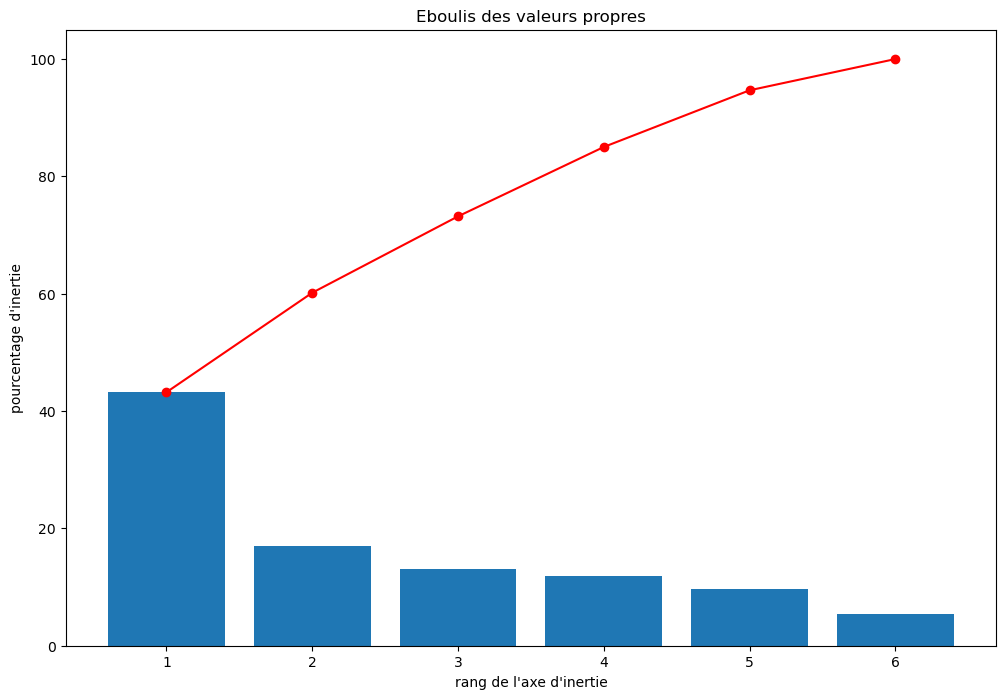

In [20]:
#variance expliquée 
valprop = acp.explained_variance_
#proportion de variance expliquée 
valprop_ratio = acp.explained_variance_ratio_
# Eboulis des valeurs propres
varexpl = valprop_ratio*100
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [21]:
print(valprop_ratio[0:2].sum())

0.6016762362291433


Les deux premiers axes cumulent <b>60,16% </b> de la variance expliquée. On effectuera donc notre ACP sur deux axes F1 et F2.

In [22]:
n_comp = 2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(Z)

PCA(n_components=2)

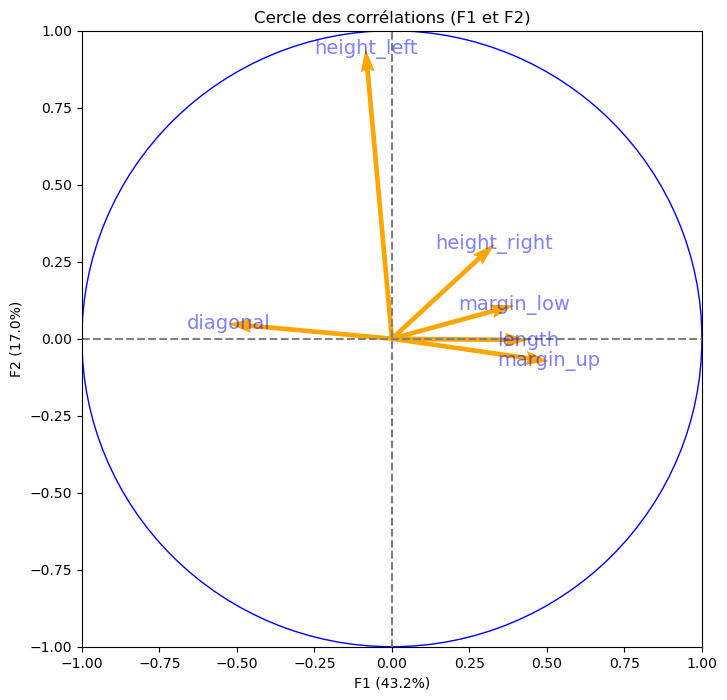

In [23]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*valprop_ratio[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*valprop_ratio[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1)], labels = np.array(liste_var))

L'axe F1 correspond aux marges et à la longueur du billet.</br>
L'axe F2 semblent correspondre à la hauteur ( grosse corrélation avec height_left).

<font size=6><b>K-means :</b></font><br />

C:\Users\picar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


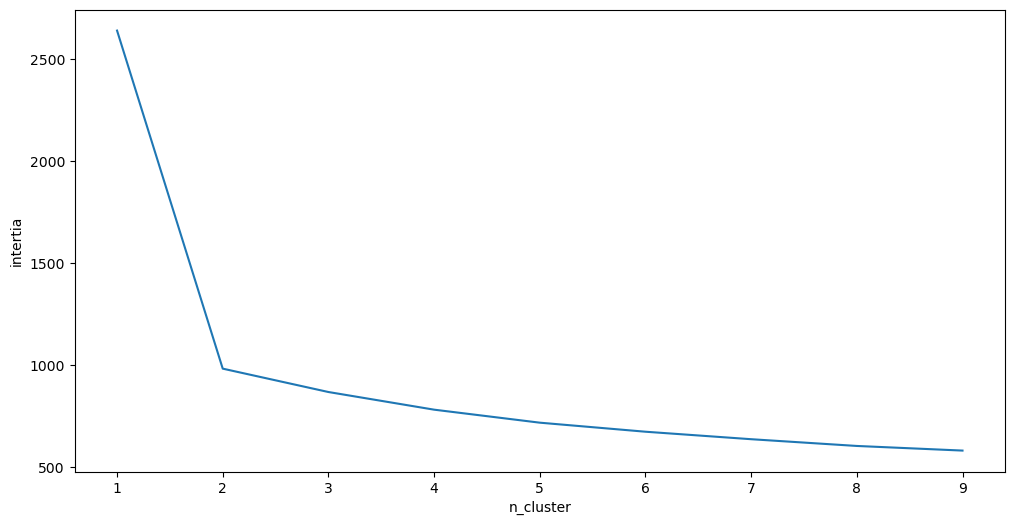

In [24]:
X=billet
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [25]:
names = billet.index
nom_variable = billet.columns
std_scale = preprocessing.StandardScaler().fit(billet)
X_scaled = std_scale.transform(billet)
kmeans = KMeans(init='random', n_clusters=2, n_init=10)
kmeans.fit(X_scaled)
# Récupération des clusters attribués à chaque individu
clusters_kmeans = kmeans.labels_
# Ajouter le nombre de clusters aux données originelles
X_scaled_clustered = pd.DataFrame(X_scaled, columns=nom_variable, index=names)
X_scaled_clustered['cluster'] = clusters_kmeans
X_scaled_clustered=X_scaled_clustered.reset_index()
X_scaled_clustered.head()

index  is_genuine  diagonal  height_left  height_right  margin_low  \
0      0    0.707107 -0.486540     2.774123      3.163240    0.056151   
1      1    0.707107 -1.633729    -2.236535     -0.799668   -1.080926   
2      2    0.707107  2.397823     1.504756     -1.291191   -0.125782   
3      3    0.707107 -1.961498    -0.399294      0.060498   -1.308341   
4      4    0.707107 -0.748754     0.836669     -1.414072   -0.671578   

   margin_up    length  cluster  
0  -1.128325  0.173651        0  
1  -0.696799  0.471666        1  
2  -0.912562  0.551901        1  
3  -0.610494  0.953075        1  
4   1.417677 -0.158750        1

In [26]:
X_scaled_clustered[X_scaled_clustered.cluster==0].describe(include='all')

index  is_genuine    diagonal  height_left  height_right  \
count   499.000000  499.000000  499.000000   499.000000    499.000000   
mean   1246.925852   -1.409962   -0.191876     0.543594      0.693680   
std     154.789054    0.094963    1.005197     0.753904      0.837871   
min       0.000000   -1.414214   -3.010357    -1.735469     -1.506233   
25%    1124.500000   -1.414214   -0.879862     0.034963      0.091219   
50%    1249.000000   -1.414214   -0.158771     0.502625      0.736343   
75%    1373.500000   -1.414214    0.431212     1.037095      1.227867   
max    1499.000000    0.707107    3.446683     2.840932      3.163240   

       margin_low   margin_up      length  cluster  
count  499.000000  499.000000  499.000000    499.0  
mean     1.116121    0.853840   -1.205364      0.0  
std      0.828298    0.784432    0.698334      0.0  
min     -1.005121   -1.128325   -3.654697      0.0  
25%      0.541303    0.295710   -1.694675      0.0  
50%      1.087100    0.856694   -1.201803      0.0  
75%      1.678380    1.396101   -0.743319      0.0  
max      3.664474    3.273239    1.102083      0.0

In [27]:
test=X_scaled_clustered[X_scaled_clustered.cluster==1]
test

index  is_genuine  diagonal  height_left  height_right  margin_low  \
1         1    0.707107 -1.633729    -2.236535     -0.799668   -1.080926   
2         2    0.707107  2.397823     1.504756     -1.291191   -0.125782   
3         3    0.707107 -1.961498    -0.399294      0.060498   -1.308341   
4         4    0.707107 -0.748754     0.836669     -1.414072   -0.671578   
5         5    0.707107  0.693427    -0.967168      0.490581   -0.095460   
6         6    0.707107  1.250634     0.502625     -0.215984    0.147117   
7         7    0.707107 -0.257102    -0.900360      0.490581   -0.762544   
8         8    0.707107  1.676733    -0.365889     -0.768948   -0.732222   
9         9    0.707107  1.676733     0.135176      0.306260   -0.671578   
10       10    0.707107 -0.420986     0.369007     -0.922549   -2.005748   
11       11    0.707107 -0.388209     1.872205      0.244820   -0.914155   
12       12    0.707107 -0.224325    -0.466103     -1.598393   -0.565451   
13       13    0.707107  0.791758     1.070499     -0.768948   -0.065138   
14       14    0.707107  0.332882    -0.532911     -0.277424   -0.595773   
15       15    0.707107 -0.748754    -0.365889     -0.553906   -0.080299   
16       16    0.707107 -2.158159     0.536029     -0.676787   -0.550290   
17       17    0.707107 -0.257102     1.471352     -1.444792    0.116795   
18       18    0.707107  1.676733    -0.466103      0.674903   -1.126409   
19       19    0.707107 -0.191548    -1.200999     -2.366399    0.101634   
20       20    0.707107 -0.289878    -0.399294      0.121939   -1.126409   
21       21    0.707107 -0.453763    -1.267808     -0.861108   -0.353197   
22       22    0.707107  0.463989    -0.232272     -0.646067   -0.838350   
23       23    0.707107  1.971724    -0.599720     -0.922549   -1.763172   
24       24    0.707107  0.857311    -0.933764     -0.093103   -0.459324   
25       25    0.707107  0.431212    -1.334617     -1.813435   -0.247070   
26       26    0.707107 -0.420986    -1.969300     -0.676787   -0.504807   
27       27    0.707107 -0.257102    -0.365889     -0.553906   -0.701900   
28       28    0.707107  0.201774     0.502625      0.736343   -0.777706   
29       29    0.707107 -1.240407    -1.468234     -0.400305   -0.580612   
30       30    0.707107 -0.814308    -0.265676      0.152659   -0.732222   
31       31    0.707107  0.070667     1.003691     -0.953269   -1.217375   
32       32    0.707107  0.103444    -0.800146     -0.062383    0.207761   
33       33    0.707107 -0.355432     0.235390     -0.123823   -0.535129   
34       34    0.707107  1.086749    -1.401426      1.596509    0.086473   
35       35    0.707107  0.168997    -0.733338     -0.830388   -0.186426   
36       36    0.707107 -0.519316     0.836669      0.429141   -0.019654   
37       37    0.707107 -0.748754     0.235390      0.828504   -1.657045   
38       38    0.707107  0.136221    -0.900360      1.074266   -0.095460   
39       39    0.707107  1.053972     0.268794      0.828504   -0.838350   
40       40    0.707107  1.578402    -0.232272      1.934432   -1.141570   
41       41    0.707107  0.398435     0.536029     -0.308144   -0.747383   
42       42    0.707107  0.463989    -1.000573     -1.813435   -1.156731   
43       43    0.707107  1.447295    -2.069513     -0.215984   -0.717061   
44       44    0.707107 -0.552093    -0.666529     -0.492466   -0.747383   
45       45    0.707107 -1.764837     2.072631     -0.891828   -0.747383   
46       46    0.707107 -1.600953    -0.967168      1.535069   -0.444163   
47       47    0.707107  0.562320     0.402412      0.029778   -0.777706   
48       48    0.707107  0.365659     0.068368     -0.308144   -1.171892   
49       49    0.707107 -0.453763    -0.699933     -0.953269   -0.095460   
50       50    0.707107 -0.027664    -0.031846     -0.308144   -0.307714   
51       51    0.707107  0.234551    -1.468234      0.521302    0.010668   
52       52    0.707107 -1.043746     0.502625     -0.

<font size=6><b>Projection des individus avec centroides :</b></font><br />

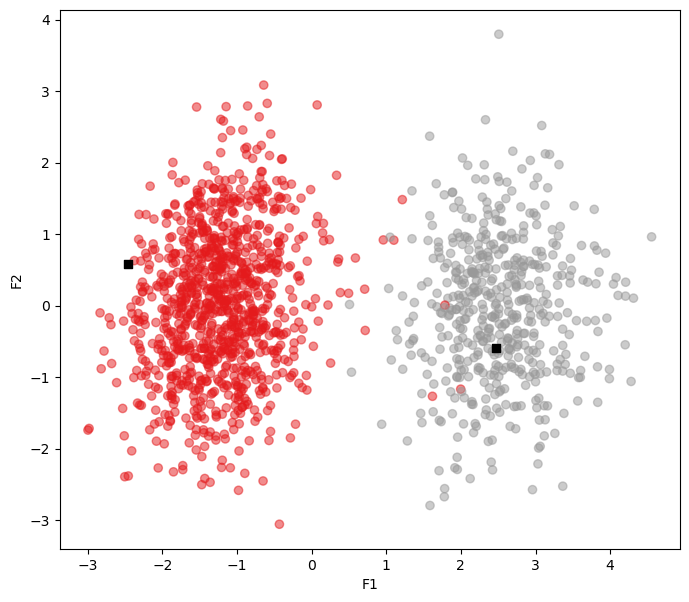

In [28]:
kmeans = KMeans(n_clusters=2)

# On l'entraine : 
kmeans.fit(billet)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
scaler = StandardScaler()
billet_scaled = scaler.fit_transform(billet)

pca = PCA(n_components=2)
pca.fit(billet_scaled)

# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2"], 
                              index=["cluster_0", "cluster_1"])



billet_proj = pca.transform(billet_scaled)
billet_proj = pd.DataFrame(billet_proj, columns = ["PC1", "PC2"])
billet_proj[:10]
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(billet_proj.iloc[:, 0], billet_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

<font size=6><b>Regression Logistique :</b></font><br />

In [29]:
#https://cedric.cnam.fr/vertigo/Cours/ml/tpDonneesManquantes.html

In [30]:
billet['is_genuine'] = billet['is_genuine'].apply(lambda x: 0 if x == True else 1)
billet["is_genuine"] = billet["is_genuine"].astype('category')

# on définit x et y
y = billet["is_genuine"].cat.codes # variables à expliquer
X = billet.select_dtypes(np.number) # variables explicatives

#subdivision des données
X_train,X_test,y_train,y_test = model_selection.train_test_split (X,y,test_size = 0.2 ,random_state=0)

#regression logistique
lr = LogisticRegression()
#modélisation sur les données d'apprentissage
modelisation = lr.fit(X_train, y_train)

proba = lr.predict_proba(X_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
proba

array([[9.76634199e-01, 2.33658006e-02],
       [9.94964485e-01, 5.03551461e-03],
       [1.39735629e-01, 8.60264371e-01],
       [9.09080803e-01, 9.09191968e-02],
       [4.28213951e-05, 9.99957179e-01],
       [5.89423165e-03, 9.94105768e-01],
       [9.28166013e-01, 7.18339874e-02],
       [9.94039149e-01, 5.96085117e-03],
       [9.99227240e-01, 7.72760151e-04],
       [7.98312786e-03, 9.92016872e-01],
       [8.26867321e-04, 9.99173133e-01],
       [1.13689772e-05, 9.99988631e-01],
       [2.17260740e-03, 9.97827393e-01],
       [9.89905399e-01, 1.00946012e-02],
       [9.99265104e-01, 7.34896131e-04],
       [9.98788594e-01, 1.21140606e-03],
       [2.62776006e-03, 9.97372240e-01],
       [2.20528912e-03, 9.97794711e-01],
       [9.99769820e-01, 2.30179671e-04],
       [1.10905868e-02, 9.88909413e-01],
       [9.99614513e-01, 3.85486908e-04],
       [9.99882271e-01, 1.17729044e-04],
       [9.96619165e-01, 3.38083464e-03],
       [9.68631732e-01, 3.13682681e-02],
       [6.448814

In [31]:
score=proba[:,1]#On ne garde que la deuxième valeur du tuple : la probabilité que le billet soit faux.
score

array([2.33658006e-02, 5.03551461e-03, 8.60264371e-01, 9.09191968e-02,
       9.99957179e-01, 9.94105768e-01, 7.18339874e-02, 5.96085117e-03,
       7.72760151e-04, 9.92016872e-01, 9.99173133e-01, 9.99988631e-01,
       9.97827393e-01, 1.00946012e-02, 7.34896131e-04, 1.21140606e-03,
       9.97372240e-01, 9.97794711e-01, 2.30179671e-04, 9.88909413e-01,
       3.85486908e-04, 1.17729044e-04, 3.38083464e-03, 3.13682681e-02,
       9.99935512e-01, 1.76468192e-02, 9.95064071e-01, 4.48858875e-02,
       4.81454427e-02, 9.99260798e-01, 9.91972477e-01, 6.08778160e-03,
       9.99180966e-01, 1.79841011e-03, 9.82105997e-01, 9.87527417e-01,
       1.18143365e-03, 1.25507627e-01, 5.78342942e-03, 3.09688838e-03,
       9.97541842e-01, 9.99683436e-01, 9.85169174e-01, 1.66649991e-01,
       1.06471733e-02, 2.07540154e-04, 2.28821314e-01, 1.20037413e-03,
       1.95998755e-03, 8.88221854e-01, 5.22604671e-03, 9.99693808e-01,
       1.59642557e-03, 9.42370824e-01, 5.05939859e-04, 9.61089867e-01,
      

In [32]:
X_test["probas_faux%"] = score*100
verif_df = pd.merge(billet.reset_index(),X_test.reset_index(),on="index", how="right")[["index","is_genuine","probas_faux%"]]
verif_df

index is_genuine  probas_faux%
0      471          0      2.336580
1        9          0      0.503551
2     1499          1     86.026437
3       54          0      9.091920
4     1411          1     99.995718
5     1157          1     99.410577
6      737          0      7.183399
7      175          0      0.596085
8      260          0      0.077276
9     1417          1     99.201687
10    1370          1     99.917313
11    1256          1     99.998863
12    1346          1     99.782739
13     187          0      1.009460
14     720          0      0.073490
15     674          0      0.121141
16    1308          1     99.737224
17    1421          1     99.779471
18     364          0      0.023018
19    1000          1     98.890941
20     182          0      0.038549
21     646          0      0.011773
22      82          0      0.338083
23     436          0      3.136827
24    1120          1     99.993551
25     828          0      1.764682
26    1136          1     99.506407
27     535          0      4.488589
28     915          0      4.814544
29    1259          1     99.926080
30    1406          1     99.197248
31     315          0      0.608778
32    1135          1     99.918097
33     906          0      0.179841
34    1105          1     98.210600
35    1379          1     98.752742
36     479          0      0.118143
37     580          0     12.550763
38     461          0      0.578343
39     317          0      0.309689
40    1211          1     99.754184
41    1374          1     99.968344
42    1493          1     98.516917
43     665          0     16.664999
44     268          0      1.064717
45     516          0      0.020754
46    1083          1     22.882131
47     708          0      0.120037
48     861          0      0.195999
49    1223          1     88.822185
50     793          0      0.522605
51    1175          1     99.969381
52     581          0      0.159643
53    1337          1     94.237082
54     536          0      0.050594
55    1313          1     96.108987
56     713          0      0.045942
57     506          0      0.706298
58    1497          1     99.644256
59    1101          1     99.983334
60     464          0      0.070385
61      66          0      7.366937
62    1055          1     99.519005
63     223          0      1.882943
64     920          0      0.008209
65     927          0      1.475595
66     513          0      0.951755
67    1237          1     99.977831
68     456          0      1.981413
69    1108          1     98.483480
70      18          0      0.181351
71     446          0      2.259265
72     794          0      1.731286
73    1061          1     99.893332
74     141          0      6.867681
75     558          0      4.294186
76     912          0      0.031870
77     211          0      0.042555
78     152          0      0.322266
79    1355          1     99.999537
80    1457          1     99.937208
81     414          0      0.011802
82     483          0      0.202539
83     477          0      0.005135
84     844          0      1.340179
85     253          0      8.932869
86    1429          1     95.391566
87     489          0      2.230016
88     567          0      0.343177
89     360          0      2.777362
90     583          0      0.024381
91     572          0      1.642899
92     278          0      0.034604
93      14          0      0.253684
94    1192          1     99.994289
95    1282          1     99.978114
96     670          0      1.322965
97     233          0      1.817963
98      31          0      0.074934
99     924          0      0.115730
100   1084          1     67.253346
101   1339          1     99.946525
102    122          0      0.077671
103    934          0      6.813353
104   1095          1     98.847613
105    893          0      0.084032
106    347          0      0.261425
107    445          0      0.553158
108    597          0      1.571037
109   1092          1     99.999631
110    19

In [33]:
X_test = X_test[["diagonal","height_left","height_right","margin_low","margin_up","length"]]
conf_matrix = confusion_matrix(y_test, lr.predict(X_test))
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['réel Vrai',"réel Faux"])
conf_matrix_df.index = ['prédit Vrai',"prédit Faux"]
conf_matrix_df

réel Vrai  réel Faux
prédit Vrai        203          0
prédit Faux          1         96

Notre modèle de prédiction réalise 4 mauvaises prédictions.Le taux d’erreur en resubstitution est de 1/300= 0,3 %.

In [34]:
fpr, tpr, seuil = roc_curve(y_test, proba[:, 1], pos_label=lr.classes_[1], drop_intermediate=False)
df_vraipos = pd.DataFrame(dict(FPR=fpr, TPR=tpr, seuil=seuil)).copy()
df_vraipos

FPR       TPR     seuil
0    0.000000  0.000000  1.999997
1    0.000000  0.010309  0.999997
2    0.000000  0.020619  0.999996
3    0.000000  0.030928  0.999995
4    0.000000  0.041237  0.999989
5    0.000000  0.051546  0.999978
6    0.000000  0.061856  0.999977
7    0.000000  0.072165  0.999962
8    0.000000  0.082474  0.999958
9    0.000000  0.092784  0.999957
10   0.000000  0.103093  0.999956
11   0.000000  0.113402  0.999945
12   0.000000  0.123711  0.999943
13   0.000000  0.134021  0.999936
14   0.000000  0.144330  0.999936
15   0.000000  0.154639  0.999922
16   0.000000  0.164948  0.999877
17   0.000000  0.175258  0.999861
18   0.000000  0.185567  0.999833
19   0.000000  0.195876  0.999818
20   0.000000  0.206186  0.999802
21   0.000000  0.216495  0.999781
22   0.000000  0.226804  0.999780
23   0.000000  0.237113  0.999778
24   0.000000  0.247423  0.999733
25   0.000000  0.257732  0.999731
26   0.000000  0.268041  0.999694
27   0.000000  0.278351  0.999683
28   0.000000  0.288660  0.999650
29   0.000000  0.298969  0.999566
30   0.000000  0.309278  0.999491
31   0.000000  0.319588  0.999465
32   0.000000  0.329897  0.999372
33   0.000000  0.340206  0.999261
34   0.000000  0.350515  0.999181
35   0.000000  0.360825  0.999173
36   0.000000  0.371134  0.999148
37   0.000000  0.381443  0.999091
38   0.000000  0.391753  0.999023
39   0.000000  0.402062  0.999006
40   0.000000  0.412371  0.998934
41   0.000000  0.422680  0.998933
42   0.000000  0.432990  0.998852
43   0.000000  0.443299  0.998473
44   0.000000  0.453608  0.998338
45   0.000000  0.463918  0.998218
46   0.000000  0.474227  0.997973
47   0.000000  0.484536  0.997827
48   0.000000  0.494845  0.997795
49   0.000000  0.505155  0.997542
50   0.000000  0.515464  0.997372
51   0.000000  0.525773  0.996965
52   0.000000  0.536082  0.996443
53   0.000000  0.546392  0.996422
54   0.000000  0.556701  0.995190
55   0.000000  0.567010  0.995064
56   0.000000  0.577320  0.994568
57   0.000000  0.587629  0.994282
58   0.000000  0.597938  0.994106
59   0.000000  0.608247  0.993955
60   0.000000  0.618557  0.993811
61   0.000000  0.628866  0.993655
62   0.000000  0.639175  0.992744
63   0.000000  0.649485  0.992218
64   0.000000  0.659794  0.992017
65   0.000000  0.670103  0.991972
66   0.000000  0.680412  0.991751
67   0.000000  0.690722  0.988909
68   0.000000  0.701031  0.988476
69   0.000000  0.711340  0.988007
70   0.000000  0.721649  0.987527
71   0.000000  0.731959  0.987393
72   0.000000  0.742268  0.985169
73   0.000000  0.752577  0.984835
74   0.000000  0.762887  0.982106
75   0.000000  0.773196  0.981980
76   0.000000  0.783505  0.975736
77   0.000000  0.793814  0.972519
78   0.000000  0.804124  0.964749
79   0.000000  0.814433  0.961285
80   0.000000  0.824742  0.961090
81   0.000000  0.835052  0.960488
82   0.000000  0.845361  0.953916
83   0.000000  0.855670  0.947560
84   0.000000  0.865979  0.947167
85   0.000000  0.876289  0.945800
86   0.000000  0.886598  0.943844
87   0.000000  0.896907  0.942371
88   0.000000  0.907216  0.934000
89   0.000000  0.917526  0.918957
90   0.000000  0.927835  0.892759
91   0.000000  0.938144  0.888222
92   0.000000  0.948454  0.860264
93   0.000000  0.958763  0.757978
94   0.000000  0.969072  0.744907
95   0.000000  0.979381  0.727398
96   0.000000  0.989691  0.672533
97   0.004926  0.989691  0.381250
98   0.009852  0.989691  0.234244
99   0.009852  1.000000  0.228821
100  0.014778  1.000000  0.181059
101  0.019704  1.000000  0.178323
102  0.024631  1.000000  0.166650
103  0.029557  1.000000  0.140213
104  0.034483  1.000000  0.125508
105  0.039409  1.000000  0.111455
106  0.044335  1.000000  0.090919
107  0.049261  1.000000  0.089329
108  0.054187  1.000000  0.073669
109  0.059113  1.000000  0.072586
110  0.064039  1.000000  0.071834
111  0.068966  1.000000  0.068677
112  0.073892  1.000000  0.068134
113  0.078818  1.000000  0.062956
114  0.083744  1.000000  0.060676
115  0.088670  1.000000  0.058115
116  0.093596  1.000000  0.05657

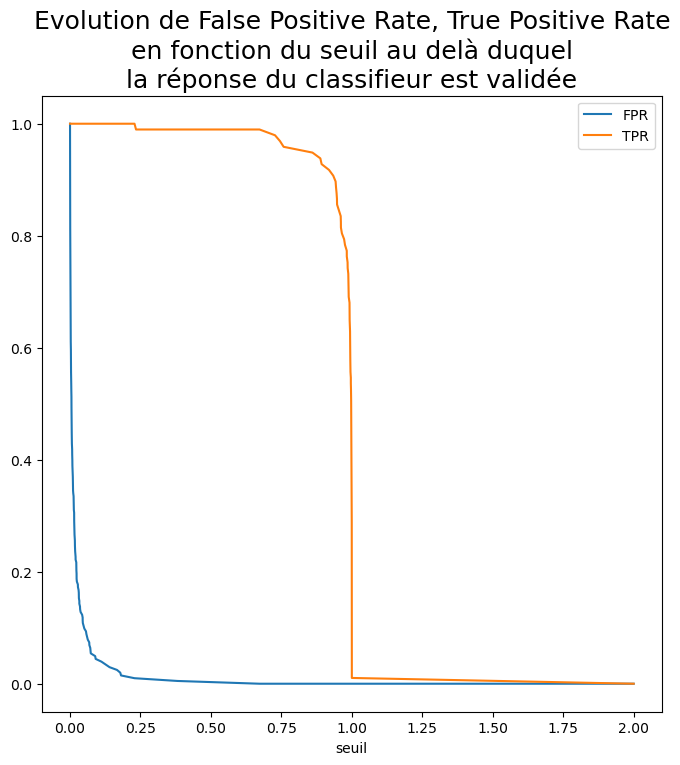

In [35]:
ax = df_vraipos.plot(x="seuil", y=['FPR', 'TPR'], figsize=(8, 8))
ax.set_title("Evolution de False Positive Rate, True Positive Rate\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée", fontsize=18);
plt.show()

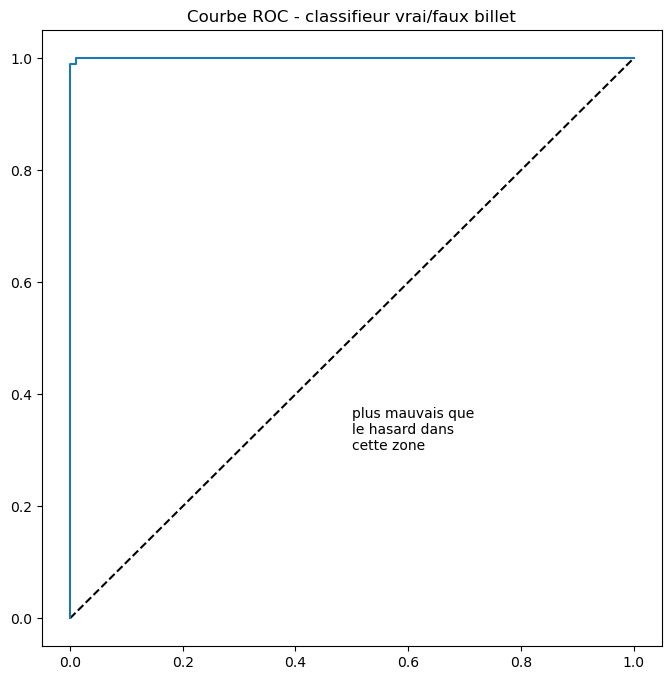

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr) 
ax.plot(fpr, tpr)
ax.set_title('Courbe ROC - classifieur vrai/faux billet')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
plt.show()


In [37]:
print("La mesure AUC est ici égale à",round(aucf,2))


La mesure AUC est ici égale à 1.0


La mesure AUC est égale à 1, le classeur distingue donc correctement les positifs des négatifs.

In [38]:
lr_dict = {}
lr_dict[0] = std_scale
lr_dict[1] = modelisation
lr_dict[2] = pca

pickle.dump(lr_dict, open('model.p', 'wb'))
